# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ This distribution is very skewed, so we have to be a bit careful in interpreting the mean and standard deviation. For example, there is a hard limit on the distribution at \\$0. Conequently, there is a limit on the meaningful number of standard deviations below the mean. Also, there may be a bimodal element to this distribution - based on a bump in the histogram at around $40,000

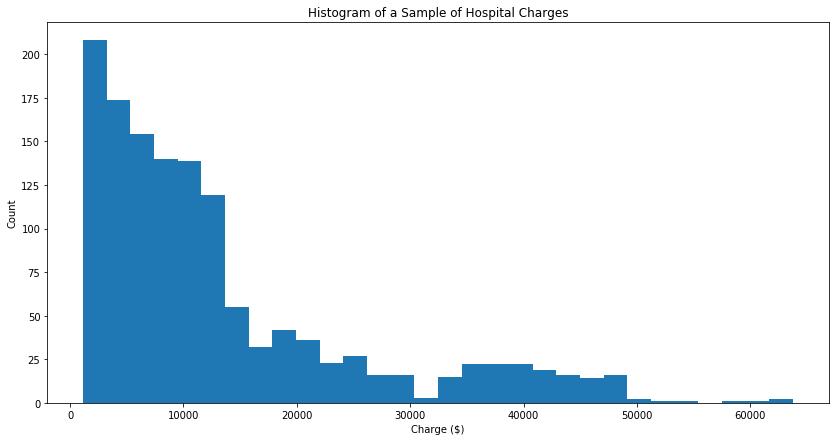

In [4]:
charges = medical['charges']
bins=30
fig, ax = plt.subplots(figsize=(14,7))
ax.hist(charges, bins=bins)
ax.set_xlabel('Charge ($)')
ax.set_ylabel('Count')
ax.set_title('Histogram of a Sample of Hospital Charges')
plt.show();

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

We could calculate a confidence interval on the sample mean. This tells us that if we keep taking sample after sample of the same size, then a certain percentage of times (say 95% - depending on our chosen confidence level) we would expect the population mean to lie within the Confidence Interval.

The population mean is fixed. It either lies within the CI, or it doesn't. The randomness is introduced because we are forced to do sampling. 

The sample is quite large so we can use the z distribution to calculate the standard error of the mean. However, I will use the t distribution for 2 reasons:
+ The sample distribution is extremely skewed
+ The t distribution will give a slightly larger Confidence Interval. This is important, because I want to test for the most prudent (or worst case scenario) in order to answer the Administrator's concern


__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ The most appropriate interval in this case is a one-sided interval, because we are trying to find out if a mean is below a particular level.

However, for completeness, and to give a more complete picture to the administrator, I will calculate both the upper and lower bounds of the Confidence Interval.

In [5]:
sample_size=len(charges)
sample_mean = np.mean(charges)
sample_stddev = np.std(charges, ddof=1)
se = sample_stddev/np.sqrt(sample_size)
df = sample_size - 1
t_005_2 =  (t.ppf(0.975, df=sample_size-1) -  t.ppf(0.025, df=sample_size-1))/2
print(f'sample_size: {sample_size}')
print(f'sample_mean: {sample_mean}')
print(f'sample_stddev: {sample_stddev}')
print(f'se: {se}')
print(f'df: {df}')
print(f't_005_2: {t_005_2}')

sample_size: 1338
sample_mean: 13270.422265141257
sample_stddev: 12110.011236694001
se: 331.0674543156824
df: 1337
t_005_2: 1.9617398886008452


In [6]:
print(f'Upper 95% CI Bound: {sample_mean + (se * t_005_2)}')
print(f'Lower 95% CI Vound: {sample_mean - (se * t_005_2)}')

Upper 95% CI Bound: 13919.890496089869
Lower 95% CI Vound: 12620.954034192644


The lower 95% CI Bound is above 1200.

This is strong evidence that the administrator should not be concerned that the average charge has fallen to $1200

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis: There is no difference between insurance and no-insurance mean charges

Alternate Hypothesis: There is a difference between insurance and no-insurance mean charges

We are assuming that the variances of the 2 groups (insurance and no-insurance charges) are the same

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [7]:
# Set up Calculations
insured = medical[medical['insuranceclaim'] == 1]['charges']
not_insured = medical[medical['insuranceclaim'] == 0]['charges']

n0 = len(insured) ; n1 = len(not_insured)

xbar0 = np.mean(insured) ; xbar1 = np.mean(not_insured)

s0 = np.std(insured, ddof=1) ; s1 = np.std(not_insured, ddof=1)

print(f'Number Insured:\t\t\t{n0}')
print(f'Number Not Insured:\t\t{n1}\n')
print(f'Mean Insured:\t\t\t{xbar0}')
print(f'Mean Not Insured:\t\t{xbar1}\n')
print(f'Sample Stdev Insured:\t\t{s0}')
print(f'Sample Stdev Not Insured:\t{s1}')

Number Insured:			783
Number Not Insured:		555

Mean Insured:			16423.928276537677
Mean Not Insured:		8821.421892306305

Sample Stdev Insured:		14045.928418802134
Sample Stdev Not Insured:	6446.510126811738


In [8]:
# Pooled Standard Deviation
num = ((n0 -1)*s0**2) + ((n1 - 1)*s1**2)
denom = (n0 + n1 -2)
s_p = np.sqrt((num)/ (denom))
s_p

11520.034268775262

In [9]:
# t test statistic
denom = s_p*np.sqrt(1/n0 + 1/n1)
t_stat = (xbar0 - xbar1)/denom
t_stat

11.89329903087671

In [10]:
t.ppf(t_stat, df=(n0 + n1 - 1))
pval = t.pdf(np.abs(t_stat), df=(n0 + n1 -1))*2
print(f'p: {pval}')

p: 4.819662851180321e-30


In [11]:
from scipy.stats import ttest_ind
t2, p2 = ttest_ind(insured, not_insured, equal_var=True)
print(f't: {t2}')
print(f'p: {2*p2}')

t: 11.893299030876712
p: 8.922460463241435e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [12]:
t2, p2 = ttest_ind(insured, not_insured, equal_var=False)
print(f't: {t2}')
print(f'p: {2*p2}')

t: 13.298031957975649
p: 2.221020643261825e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No I cannot see one.

statsmodels has a function `statsmodels.stats.weightstats.ztest` that could be used an an equivalent for a `ttest_ind`



## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test